In [7]:
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.deconvolution.psfs import recenter_psf_axial
from tnia.plotting.projections import show_xy_zy_slice, show_xy_zy_slice_center

sdeconv 1.x.x detected


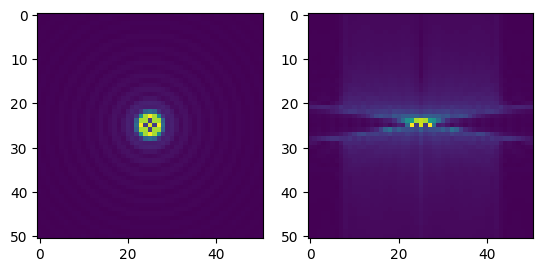

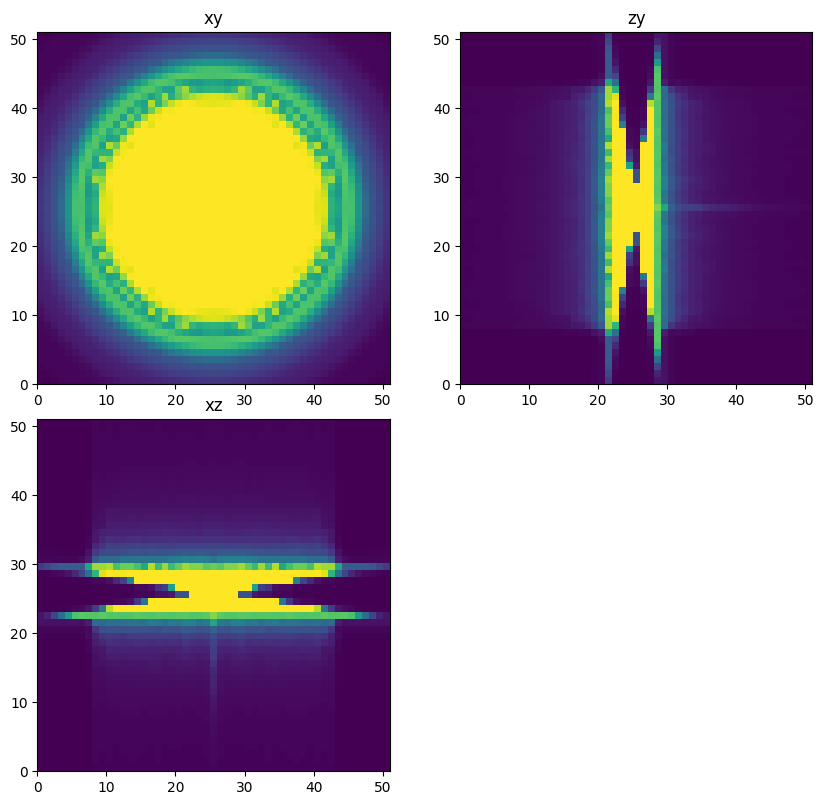

In [31]:

NA=0.45
ni=1
ns=1.5
wavelength = 0.536
depth = 200 
xy_spacing = 1.39
z_spacing = 20
confocal = False

xy_psf_dim = 51
z_calculated_psf_dim = 201
z_crop_psf_dim = 51

psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_calculated_psf_dim, depth, wavelength, confocal)

psf=recenter_psf_axial(psf, z_crop_psf_dim)
psf = psf**1.1
psf=psf/psf.sum()

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(psf[z_crop_psf_dim//2], norm=PowerNorm(gamma=0.4))
ax2.imshow(psf[:, xy_psf_dim//2], norm=PowerNorm(gamma=0.4))

plt.show()

from tnia.plotting.projections import show_xyz_max
fig = show_xyz_max(psf,vmax=psf.max()/100)

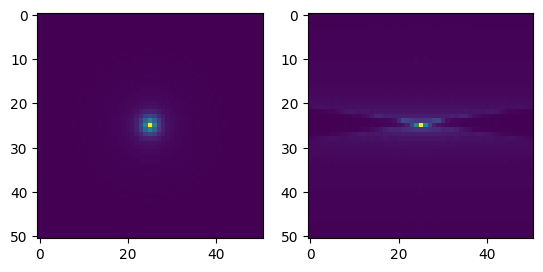

In [32]:
import psfmodels as psfm
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

# generate centered psf with a point source at `pz` microns from coverslip
# shape will be (127, 127, 127)
psf = psfm.make_psf(z_crop_psf_dim, xy_psf_dim, model='scalar', dxy=xy_spacing, dz=z_spacing, pz=depth, ni0=ni, ni=ni, ns=1.4, NA=NA, wvl=wavelength)
confocal_factor = 1.2
psf=psf**confocal_factor
psf=psf/psf.sum()
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(psf[z_crop_psf_dim//2], norm=PowerNorm(gamma=0.4))
ax2.imshow(psf[:, xy_psf_dim//2], norm=PowerNorm(gamma=0.4))
plt.show()

In [12]:
help(psfm.make_psf)

Help on function make_psf in module psfmodels._core:

make_psf(z: Union[int, Sequence[float]] = 51, nx: int = 51, *, dxy: float = 0.05, dz: float = 0.05, pz: float = 0.0, NA: float = 1.4, wvl: float = 0.6, ns: float = 1.47, ni: float = 1.515, ni0: float = 1.515, tg: float = 170, tg0: float = 170, ng: float = 1.515, ng0: float = 1.515, ti0: float = 150.0, oversample_factor: int = 3, normalize: bool = True, model: Literal['vectorial', 'scalar', 'gaussian'] = 'vectorial')
    Compute microscope PSF.
    
    Select the PSF model using the `model` keyword argument. Can be one of:
        vectorial:  Vectorial PSF described by Aguet et al (2009).
        scalar:     Scalar PSF model described by Gibson and Lanni.
        gaussian:   Simple gaussian approximation.
    
    Parameters
    ----------
    z : Union[int, Sequence[float]]
        If an integer, z is interepreted as the number of z planes to calculate, and
        the point source always resides in the center of the z volume (at p

In [16]:
51//2

25